<a href="https://colab.research.google.com/github/Molten-Ice/de-identification/blob/colab/de_identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#check which GPU is being used:
!nvidia-smi

Tue May 23 14:55:12 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    25W / 300W |      0MiB / 16384MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4534  100  4534    0     0  22445      0 --:--:-- --:--:-- --:--:-- 22557


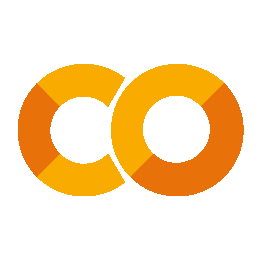

In [2]:
!curl -o logo.png https://colab.research.google.com/img/colab_favicon_256px.png
import cv2
from PIL import Image
original_img = cv2.imread('logo.png')
original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
display(Image.fromarray(original_img))

import ipywidgets as widgets
from IPython.display import display

# Create text box and button widgets
text = widgets.Text(
    value='', 
    placeholder='Type something', 
    description='String:', 
    disabled=False
)
button = widgets.Button(description='Submit')

# Display the widgets
display(text)
display(button)

# Define button click event handler
def on_button_clicked(b):
    # Do something with text.value
    print(f"Button clicked. Text entered: {text.value}")
    display(Image.fromarray(original_img))

# Attach the event handler to the 'on_click' event of the button
button.on_click(on_button_clicked) 
print("Pogchamp")

In [ ]:
!git clone --recurse-submodules --quiet -b colab https://github.com/Molten-Ice/de-identification
!wget -P /content/de-identification/ https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl
!pip install --quiet -r ./de-identification/requirements.txt

--2023-05-23 12:54:32--  https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl
Resolving nvlabs-fi-cdn.nvidia.com (nvlabs-fi-cdn.nvidia.com)... 52.222.139.123, 52.222.139.28, 52.222.139.85, ...
Connecting to nvlabs-fi-cdn.nvidia.com (nvlabs-fi-cdn.nvidia.com)|52.222.139.123|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 381624121 (364M) [binary/octet-stream]
Saving to: ‘/content/de-identification/ffhq.pkl’

ffhq.pkl            100%[===================>] 363.94M   188MB/s    in 1.9s    

2023-05-23 12:54:35 (188 MB/s) - ‘/content/de-identification/ffhq.pkl’ saved [381624121/381624121]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 205.9/205.9 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.9/26.9 MB 61.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 92.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# Moving test image to base dir, update starting image here
!cp de-identification/media/test_image.jpg ./

#Input filename
image_filepath = 'test_image.jpg'

In [ ]:
import sys
base_dir = '/content/'
sys.path.insert(1, base_dir + 'de-identification/')
from helper_functions import *

sys.path.insert(1, base_dir + 'de-identification/stylegan2-ada-pytorch')

import dnnlib
import torch_utils
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
assert device.type == "cuda", "Error, not running on gpu!"

print("Loading models, if running for first time will take a few minutes...")
with open('./de-identification/ffhq.pkl', 'rb') as f:
    G = pickle.load(f)['G_ema'].to(device)  
with open('./de-identification/ffhq.pkl', 'rb') as f:
    D = pickle.load(f)['D'].to(device)
    
# First time running through sets up pluggins and takes a few minutes, after that takes < 1 second
z = torch.randn([1, G.z_dim]).to(device) # 512 latent vector                  
img = G(z, None)  # NCHW, float32, dynamic range [-1, +1], None is class labels
print("Model setup complete!")

Loading models, if running for first time will take a few minutes...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
Model setup complete!


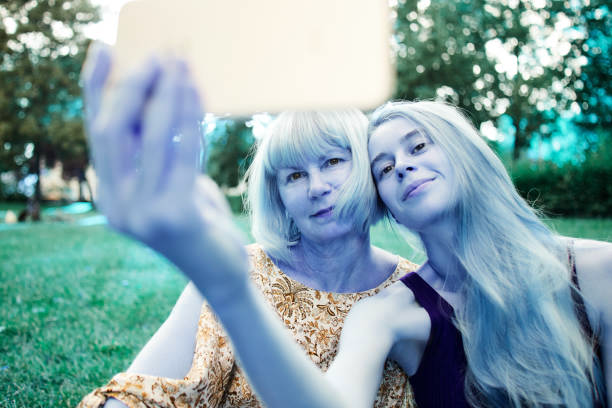

width: 601, height: 725


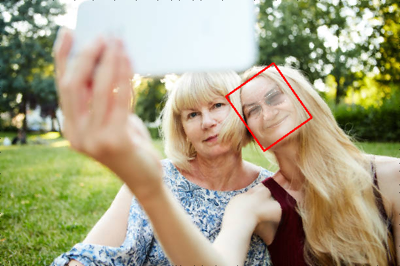

Losses, 0 iteration:: Complete:-1.6259, contextual:0.1441, perceptual:-1.7700 (after x0.1), time: 0.09s
Losses, 50 iteration:: Complete:-3.3642, contextual:0.1402, perceptual:-3.5044 (after x0.1), time: 3.93s
Losses, 99 iteration:: Complete:-3.5249, contextual:0.1359, perceptual:-3.6608 (after x0.1), time: 7.27s


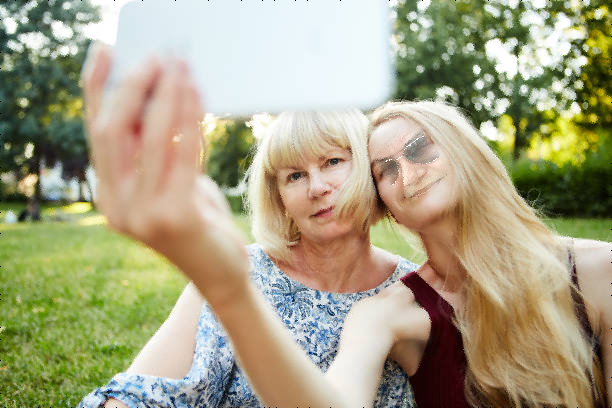

width: 583, height: 681


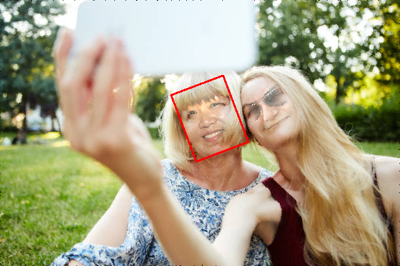

Losses, 0 iteration:: Complete:-1.4018, contextual:0.2382, perceptual:-1.6401 (after x0.1), time: 0.08s
Losses, 50 iteration:: Complete:-3.6381, contextual:0.2291, perceptual:-3.8671 (after x0.1), time: 3.36s
Losses, 99 iteration:: Complete:-4.0600, contextual:0.2282, perceptual:-4.2882 (after x0.1), time: 7.28s


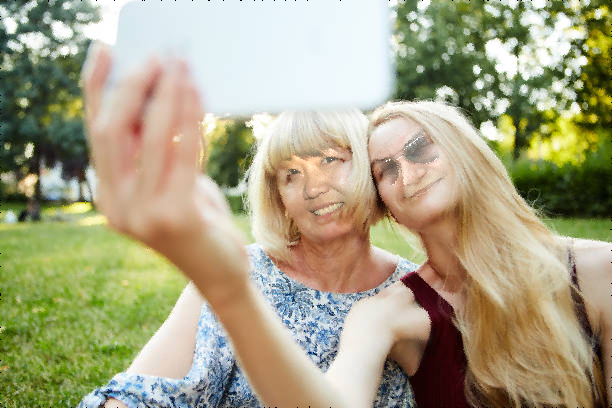

In [ ]:
def test():
    border_factor = 0.15

    !rm -rf frames
    if not os.path.exists("frames"):
        os.makedirs("frames")


    ## Loading original image ##
    original_img = cv2.imread(image_filepath)
    original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)

    ## Padding image to ensure during rotation faces do not leave the image ##
    pad_width = max(original_img.shape[:2])//2
    original_img_padded = np.zeros([original_img.shape[0]+2*pad_width, original_img.shape[1]+2*pad_width, 3], dtype = original_img.dtype)
    original_img_padded[pad_width:-pad_width, pad_width:-pad_width] = original_img.copy()
    # save_image(original_img_padded, pad_width, 1)

    ## finding boxes, landmarks in original image
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    mtcnn = MTCNN(keep_all=True, device=device) # Face detection model
    original_boxes, original_landmarks, original_probs = generate_boxes_landmarks(original_img_padded, mtcnn, device)

    ### For visualization purposes - Drawing boxes on all faces ###
    annotated_faces_img = original_img_padded.copy()
    for box in original_boxes:
        cv2.rectangle(annotated_faces_img, box[:2], box[2:], (255, 0, 0), 2)
    display_image = Image.fromarray(annotated_faces_img[pad_width:-pad_width, pad_width:-pad_width])
    display_image.save(f"frames/image_{1}.jpg")
    
    frame_num = 2
    ## Looping through each face in the image ##
    for box, landmark in zip(original_boxes, original_landmarks):
        left_eye, right_eye = landmark[0], landmark[1]
        rotate_angle = calculate_rotate_angle(left_eye, right_eye)
        face_centre = [(box[0] + box[2])//2, (box[1] + box[3])//2]
        rotated_img = np.array(Image.fromarray(original_img_padded).rotate(rotate_angle, center=face_centre, expand=False))
        rotated_box = find_new_bbox_cords(mtcnn, rotated_img, face_centre, device)
        cropped_face = rotated_img[rotated_box[1]:rotated_box[3], rotated_box[0]:rotated_box[2]].copy()

        #latent vector for synthesized face
        valid_face = False
        while not valid_face:
            fixed_noise = torch.randn([1, G.z_dim]).to(device) # 512 latent vector     
            cropped_real_face_tensor, mask, box_generated, generated_face =  generate_inpainting_inputs(G, D, mtcnn, device, cropped_face, fixed_noise, border_factor = 0.15)
            blended_img_rotated = poisson_blend(generated_face, rotated_img.copy(), rotated_box)
            cv2.rectangle(blended_img_rotated, rotated_box[:2], rotated_box[2:], (255, 0, 0), 2)
            blended_img_unrotated = np.array(Image.fromarray(blended_img_rotated).rotate(-rotate_angle, center=face_centre, expand=False))
            display(ImageOps.contain(Image.fromarray(blended_img_unrotated[pad_width:-pad_width, pad_width:-pad_width]), (400, 400)))
            # user_input = input("Is the above generated face a suitable starting face?:")
            if True or user_input in ['Yes', 'YES', 'Y', 'y']:
                valid_face = True

        inpainted_faces = inpaint(G, D, mtcnn, device, cropped_face, fixed_noise, cropped_real_face_tensor, mask, box_generated, lr = 0.003, iterations = 100, lam = 1, eval_interval = 50, border_factor = 0.15)

        #Visualize all progress
        images_to_save = visualize_progress(original_img_padded, box, landmark, face_centre, rotate_angle, rotated_img, rotated_box, pad_width, inpainted_faces, border_factor)
        for image in images_to_save:
            display_image = Image.fromarray(image[pad_width:-pad_width, pad_width:-pad_width])
            display_image.save(f"frames/image_{frame_num}.jpg")
            frame_num+=1
            # display(ImageOps.contain(display_image, (400, 400)))

        #Poisson blend inpainted face onto rotated face
        blended_img = poisson_blend(inpainted_faces[-1], rotated_img, rotated_box)
        #rotate back to original orientation and set as base image
        original_img_padded = np.array(Image.fromarray(blended_img).rotate(-rotate_angle, center=face_centre, expand=False))
        display(Image.fromarray(original_img_padded[pad_width:-pad_width, pad_width:-pad_width]))

        

test()

In [ ]:
!cd frames && ffmpeg -start_number 4 -framerate 2 -i image_%d.jpg \
  -c:v libx264 -pix_fmt yuv420p de-identification-progress.mp4
!mv frames/de-identification-progress.mp4 de-identification-progress.mp4

ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --e

In [ ]:
if display_intermediate:
    images_to_concat = []
    for image in [cropped_real_face_tensor, generated_img_tensor, mask,mask*cropped_real_face_tensor, mask*generated_img_tensor, cropped_real_face_tensor*mask+generated_img_tensor*(1-mask)]:
        images_to_concat.append(tensor_to_np(image))
    display_img = np.concatenate(images_to_concat,axis=1)
    display(ImageOps.contain(Image.fromarray(display_img), (1500, 1500)))


if display_intermediate:
    images_to_concat = []
    for image in [cropped_real_face_tensor, mask, progress[-1]]:
        images_to_concat.append(tensor_to_np(image))
    display_img = np.concatenate(images_to_concat,axis=1)
    display(ImageOps.contain(Image.fromarray(display_img), (1500, 1500)))

def visualize_progress(original_img_padded, box, left_eye, right_eye, rotate_angle, rotated_img, rotated_box, inpainted_faces):
    #1. Draw original face box on
    annotated_faces_img = original_img_padded.copy()
    cv2.rectangle(annotated_faces_img, box[:2], box[2:], (255, 0, 0), 2)
    save_image(annotated_faces_img, pad_width)

    #2. Drawing eyes
    left_eye, right_eye = landmark[0], landmark[1]
    cv2.circle(annotated_faces_img, left_eye, 3, (0,255,255), -1)
    save_image(annotated_faces_img, pad_width)
    cv2.circle(annotated_faces_img, right_eye, 3, (0,255,255), -1)
    save_image(annotated_faces_img, pad_width)

    #3. Creating and drawing 3rd point to create triangle
    if left_eye[1] > right_eye[1]: # right eye higher than left eye
        third_point = (right_eye[0], left_eye[1]) # rotating clockwise
    else:
        third_point = (left_eye[0], right_eye[1]) # rotating counter-clockwise
    cv2.circle(annotated_faces_img, third_point, 3, (0,255,255), -1)
    save_image(annotated_faces_img, pad_width)

    #4. Drawing triangle
    for pair in [[left_eye, right_eye], [left_eye, third_point], [right_eye, third_point]]:
        cv2.line(annotated_faces_img, pair[0], pair[1], (0,255,0), 1)
    save_image(annotated_faces_img, pad_width)

    #5. Rotating image, writing angle on it
    rotated_img_annotated = np.array(Image.fromarray(annotated_faces_img).rotate(rotate_angle, center=face_centre, expand=False))
    cv2.putText(rotated_img_annotated, f"Rotating by {rotate_angle:.2f}° anti-clockwise", (pad_width+10,pad_width+30), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
    save_image(rotated_img_annotated, pad_width)

    #6. Draw on new face on fulled labelled image
    cv2.rectangle(rotated_img_annotated, rotated_box[:2], rotated_box[2:], (0, 255, 0), 2)
    save_image(rotated_img_annotated, pad_width)

    #7. Draw face on tidy image
    rotated_img_annotated = rotated_img.copy()
    cv2.rectangle(rotated_img_annotated, rotated_box[:2], rotated_box[2:], (0, 255, 0), 2)
    save_image(rotated_img_annotated, pad_width)

    #8. Perform Facial obfuscation 
    x1, y1, x2, y2 = rotated_box
    width = x2 - x1
    height = y2 - y1
    width_border = int(width * border_factor)
    height_border = int(height * border_factor)
    rotated_img_obscured = rotated_img_annotated.copy()
    cv2.rectangle(rotated_img_obscured, [x1+width_border, y1+height_border], [x2-width_border-1, y2-height_border-1], (255, 255, 255), -1)
    save_image(rotated_img_obscured, pad_width)

    #9. obfuscation image rotated to original orientation
    unrotated_img_annotated = np.array(Image.fromarray(rotated_img_obscured).rotate(-rotate_angle, center=face_centre, expand=False))
    save_image(unrotated_img_annotated, pad_width)


    #10. Place raw generated face onto image
    rotated_img_annotated_raw = rotated_img_annotated.copy()
    start_x, start_y = rotated_box[1]+height_border, rotated_box[0]+width_border
    rotated_img_annotated_raw[start_x:start_x+inpainted_faces[0].shape[0], start_y:start_y+inpainted_faces[0].shape[1]] = inpainted_faces[0] # naive replacement
    unrotated_img_annotated_raw = np.array(Image.fromarray(rotated_img_annotated_raw).rotate(-rotate_angle, center=face_centre, expand=False))
    save_image(unrotated_img_annotated_raw, pad_width)

    #11. Poisson blend and show progress
    for inpainted_face in inpainted_faces:
        rotated_img_blended = rotated_img_annotated.copy()
        rotated_img_blended = poisson_blend(inpainted_face, rotated_img_blended, rotated_box)
        unrotated_img_blended = np.array(Image.fromarray(rotated_img_blended).rotate(-rotate_angle, center=face_centre, expand=False))
        save_image(unrotated_img_blended, pad_width)



def generate_inpainting_inputs(G, D, mtcnn, device, cropped_face, fixed_noise, border_factor = 0.15):
    ## Generate image             
    generated_img_tensor = G(fixed_noise, None)  # NCHW, float32, dynamic range [-1, +1], None is class labels
    generated_img = tensor_to_np(generated_img_tensor)

    #finds boxes, landmarks using generated image
    generated_boxes, generated_landmarks, generated_probs = generate_boxes_landmarks(generated_img, mtcnn, device)
    #Add loop to create different generated face if this is the case
    assert len(generated_boxes) >=1, "No faces detected in generated image"
    assert len(generated_boxes) == 1, "Two faces detected in generated image"
    box_generated = generated_boxes[0]
    x1, y1, x2, y2 = box_generated
    width = x2 - x1
    height = y2 - y1
    print(f"width: {width}, height: {height}")

    tensor_transform = transforms.ToTensor()

    border_width = int(width*border_factor)
    border_height = int(height*border_factor)
    mask = torch.zeros((1, 3, 1024, 1024)).to(device)
    mask[:, :, y1:y2, x1:x2] = 1
    mask[:, :, y1+border_height:y2-border_height, x1+border_width:x2-border_width] = 0

    #convert real face to torch tensor, place aligned with generated face in 1024x1024 square
    resized_face = cv2.resize(cropped_face.copy(), [width, height])
    cropped_real_face_tensor = torch.zeros((1, 3, 1024, 1024)).to(device)
    cropped_real_face_tensor[:, :, y1:y2, x1:x2] = tensor_transform(resized_face).unsqueeze(dim=0).to(device)

    generated_face = generated_img[y1:y2, x1:x2]
    resized_face = cv2.resize(generated_face, (cropped_face.shape[1], cropped_face.shape[0]))
    border_width = int(resized_face.shape[1]*border_factor)
    border_height = int(resized_face.shape[0]*border_factor)
    resized_face = resized_face[border_height:-border_height, border_width:-border_width]

    return cropped_real_face_tensor, mask, box_generated, resized_face
    
def inpaint(G, D, mtcnn, device, cropped_face, fixed_noise, cropped_real_face_tensor, mask, box_generated, lr = 0.0003, iterations = 1500, lam = 0.1, eval_interval = 200,  border_factor = 0.15):

    ## Train ##
    progress = train(G, D, fixed_noise, cropped_real_face_tensor, mask, lr = lr, iterations = iterations, lam = lam, eval_interval = eval_interval)

    inpainted_faces = []
    x1, y1, x2, y2 = box_generated
    for inpainted_face in progress:
        inpainted_face = tensor_to_np(inpainted_face[:, :, y1:y2, x1:x2])
        inpainted_face = cv2.resize(inpainted_face, (cropped_face.shape[1], cropped_face.shape[0]))

        border_width = int(inpainted_face.shape[1]*border_factor)
        border_height = int(inpainted_face.shape[0]*border_factor)
        inpainted_face = inpainted_face[border_height:-border_height, border_width:-border_width]
        inpainted_faces.append(inpainted_face)
    return inpainted_faces